In [464]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt

Punto 1: Derivadas

1. Gráfica de la corriente sobre el bucle en función del tiempo

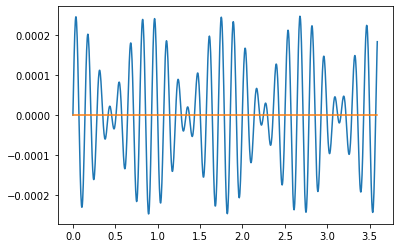

In [465]:
r = 0.25
R = 1750
B0 = 0.05
f = 7
Omega = 3.5
T_bucle = (2*np.pi)/Omega

t = np.linspace(0,2*T_bucle,1000)
h = t[1]-t[0]

def Derivada(f,x,h=1e-8):
    return (f(x+h)-f(x-h))/(2*h)

def Flujo(t):
    return np.pi*(r**2)*B0*np.cos(Omega*t)*np.cos(2*np.pi*f*t)

def Corriente_Inducida(t):
    return (-1)*(1/R)*Derivada(Flujo,t)

I = Corriente_Inducida(t)
D_I = Derivada(Corriente_Inducida,t)

cero = np.tile(0,reps=len(t))
plt.plot(t,I)
#plt.plot(t,D_I)
plt.plot(t,cero)

2. Tres primeros instantes donde la corriente sobre el bucle es 0

array([0.        , 0.07096974, 0.14187736])

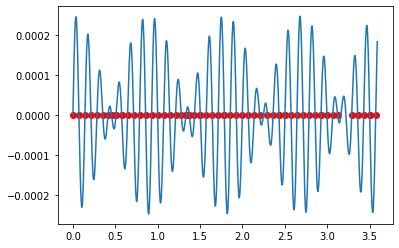

In [466]:
def GetNewtonMethod(f,df,xn,itmax=1000,precision=1e-13):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - (f(xn)/df(f,xn))/5
            # Criterio de parada
            error = 0.5*np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
        
   # print('Raiz',xn,it)
    
    if it == itmax:
        return False
    else:
        return xn

def GetAllRoots(x, tolerancia=10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(Corriente_Inducida,Derivada,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

Roots = GetAllRoots(t)
plt.plot(t,Corriente_Inducida(t))
plt.scatter(Roots[1:],Corriente_Inducida(Roots[1:]),color='r')
Roots[1:4]